<a href="https://colab.research.google.com/github/KILjungjoon/Project_Asian_Parliament/blob/main/EDA(Singapore_Parliamentary_Records).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.Install and import libraries

In [ ]:
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import seaborn as sns 
import time     # sleep 함수 사용

## 2.Read html file + Basic preprocessing

In [ ]:
import os
files=[]
file_names=os.listdir("/content/drive/MyDrive/Project_prof.Jang/data")
for file in file_names :
  if 'html' in file :
    # print(file)
    files.append(file)

In [ ]:
for file in files :
  file=file[:9]        # 확장자 앞의 file name만 추출

* for문으로 이하의 전체 코드를 반복 실행할 수 있음.

In [ ]:
## Extraction Text from html
# https://stackoverflow.com/questions/328356/extracting-text-from-html-file-using-python

from urllib.request import urlopen
from bs4 import BeautifulSoup

html = open('/content/drive/MyDrive/Project_prof.Jang/data/'+file+'.html')
sp = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in sp(["script", "style"]):
    script.extract()    # rip it out

# get text
text = sp.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

text1=text.replace("Column:","")
text2=text1.replace("Mr","")
# print(text2)

## Extraction Sentences
# 행을 기준으로 마침표(.)가 제일 뒤에 있는 라인만 다시 추려낸다.
texts=text2.split('\n')
# print(len(texts))
sents=[]
cnt=0
for line in texts :
  if '.' in line and line[-1]=='.':
    cnt=cnt+1
    # print(line.strip())
    sents.append(line.strip())
# print(cnt)

# 3.Lengths of Sentence

In [ ]:
## output 1 : df.describe()
# https://tinyurl.com/2czj2edo

from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
import pandas as pd

sent_lengths=[len(s) for s in sents]
df=pd.Series(sent_lengths)

df.describe()
# dscrb=df.describe()
# dscrb.to_csv('/content/drive/MyDrive/Project_prof.Jang/output/'+str(file)+'_describe.csv', index=False, header=True)

count       20.000000
mean      7781.100000
std       5688.276539
min          2.000000
25%       1207.750000
50%      10006.000000
75%      12864.000000
max      14503.000000
dtype: float64

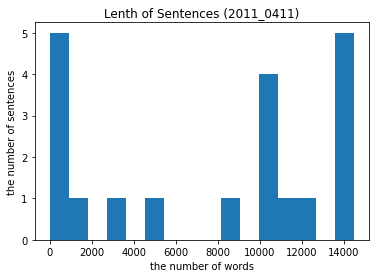

In [ ]:
## output 2 : histogram
length=str(len(sents))
title='Lenth of Sentences ('+file+')'
plt.title(title)
plt.ylabel('the number of sentences')
plt.xlabel('the number of words')
a=plt.hist(sent_lengths, bins=16)    

# plt.savefig('/content/drive/MyDrive/Project_prof.Jang/output/'+file+'_SentLen_hist.png', 
#             dpi=200, facecolor='#eeeeee', edgecolor='blue')                                           

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


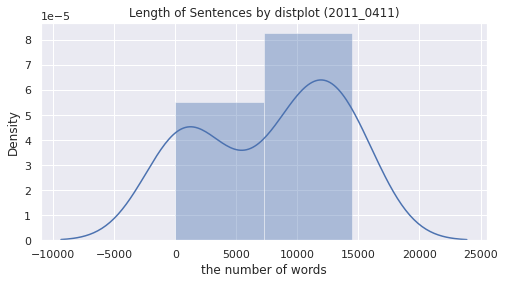

In [ ]:
## output 3 : distplot
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
ax = sns.distplot(sent_lengths)
plt.xlabel('the number of words')
plt.title('Lenth of Sentences by distplot')
plt.title('Length of Sentences by distplot ('+file+')')
a=plt.show()

# plt.savefig('/content/drive/MyDrive/Project_prof.Jang/output/'+file+'_SentLen_dist.png', 
#             dpi=200, facecolor='#eeeeee', edgecolor='blue')   

## 4.Basic Tokenizing
* lower()로 인해 고유명사가 손실될 수 있음.

In [ ]:
str=" ".join(sents)
# print(str)
import re
text=re.sub("[.,:()]"," ", str)      # 부호 제거, 하이픈(-)은 예외
text=re.sub("[\s]{2,3}"," ", text)   # 2칸 이상의 공백을 1칸으로 조정
text=text.lower()                    # 대문자->소문자
# print(text)

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
tokens=nltk.word_tokenize(text)     
# print(len(tokens))
# print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Lemmatization의 결과가 부정확하므로 lemmantized_token을 사용하지 않는다.
# from nltk.stem import WordNetLemmatizer
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# lemmatizer=WordNetLemmatizer()
# lemmantized_token=[lemmatizer.lemmatize(word) for word in tokens]

# print('표제어 추출 전 :',tokens)
# print('표제어 추출 후 :',lemmantized_token)

# 5.N-gram

In [ ]:
# Creating n-grams
# (pd.Series(nltk.ngrams(tokens, 2)).value_counts())[:30]   # bigram 내림차순 정렬 출력
# (pd.Series(nltk.ngrams(tokens, 3)).value_counts())[:30]   # trigram 내림차순 정렬 출력
# (pd.Series(nltk.ngrams(tokens, 4)).value_counts())[:30]   # fourgram 내림차순 정렬 출력
bigrams_series = (pd.Series(nltk.ngrams(tokens, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(tokens, 3)).value_counts())[:20]
fourgrams_series= (pd.Series(nltk.ngrams(tokens, 4)).value_counts())[:20]

Text(0.5, 0, 'Occurances')

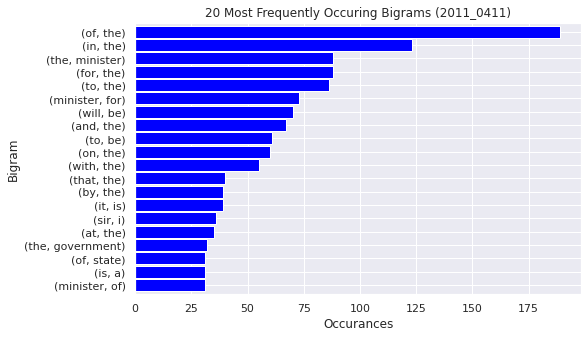

In [ ]:
# output 4 : Bigram
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 5))
plt.rcParams.update({'font.size': 17})   # changing a font size

# plt.ylim(0, 22)  # y축 범위 지정
plt.title('20 Most Frequently Occuring Bigrams ('+file+')')
plt.ylabel('Bigram')
plt.xlabel('Occurances')

# plt.savefig('/content/drive/MyDrive/Project_prof.Jang/output/'+file+'_bigram.png', 
#             dpi=200, edgecolor='blue')     

Text(0.5, 0, 'Occurances')

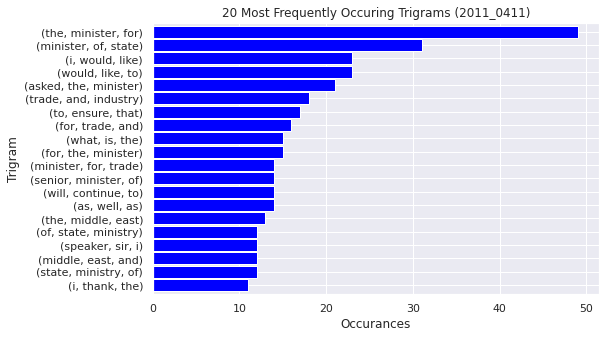

In [ ]:
# output 5 : Trigram
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 5))
plt.rcParams.update({'font.size': 17})   # changing a font size
plt.title('20 Most Frequently Occuring Trigrams ('+file+')')
plt.ylabel('Trigram')
plt.xlabel('Occurances')

# plt.savefig('/content/drive/MyDrive/Project_prof.Jang/output/'+file+'_trigram.png', 
#             dpi=200, edgecolor='blue')     

In [ ]:
# fourgrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 5))
# plt.rcParams.update({'font.size': 17})   # changing a font size
# plt.title('20 Most Frequently Occuring Fourgrams ('+file+')')
# plt.ylabel('Fourgram')
# plt.xlabel('Occurances')

# plt.savefig('/content/drive/MyDrive/Project_prof.Jang/output/'+file+'_fourgram.png', 
#             dpi=200, edgecolor='blue')     

# 6.Vocabulary-level Statistics

In [ ]:
# Token Cleansing by Removing stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))

clean_tokens=[]
for token in tokens:
  if len(token.lower())>1 and (token.lower() not in stop):
    clean_tokens.append(token)

# print(len(tokens))
# print(len(clean_tokens))
# print("tokens after stopwords: ",clean_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


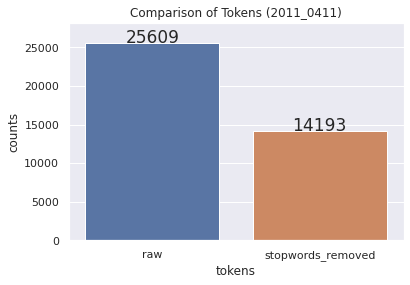

In [ ]:
# # output 6 : Comparison of Tokens
import pandas as pd
import seaborn as sns 

comparison_list = [ ['raw', len(tokens)],['stopwords_removed', len(clean_tokens)] ]
column_name = ['tokens', 'counts']
tokens_df = pd.DataFrame.from_records(comparison_list, columns=column_name)

# print(tokens_df)

fig, ax = plt.subplots( figsize=(6,4) )
max=len(tokens)*1.1
plt.ylim(0, max)        # automatically adjust y-axis range
plt.title('Comparison of Tokens ('+file+')')
plt.ylabel('the number of tokens')
plt.xlabel('tokens')
sns.barplot(data=tokens_df, x= 'tokens', y= 'counts')

# barplot value print(https://blog.naver.com/kiddwannabe/222655678945)
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            int(p.get_height()),     # 값 + 표시방법 
            ha = 'center' )   # 좌우정렬 중간으로

# plt.savefig('/content/drive/MyDrive/Project_prof.Jang/output/'+file+'_TokenComp.png', 
#             dpi=200, edgecolor='blue')     

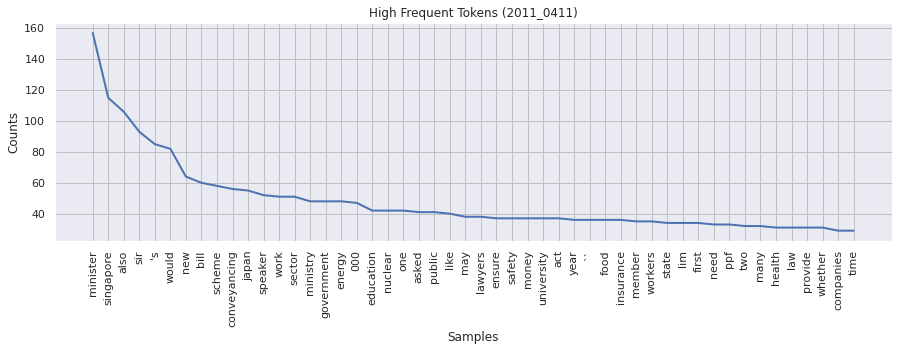

In [ ]:
# output 7 : High Frequent Tokens
import matplotlib
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 4))  
plt.rcParams.update({'font.size': 17})   
plt.title('High Frequent Tokens ('+file+')')
Freq_dist_nltk=nltk.FreqDist(clean_tokens)  # FreqDist Class
Freq_dist_nltk.plot(50, cumulative=False)

# plt.savefig('/content/drive/MyDrive/Project_prof.Jang/output/'+file+'_hifrqtokens.png', 
#             dpi=200, edgecolor='blue')    

# 7.POS tagging

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

tokens_tag = pos_tag(clean_tokens)  
# print(len(tokens_tag))
# tokens_tag         # print tuple type

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 8.Nouns Analysis

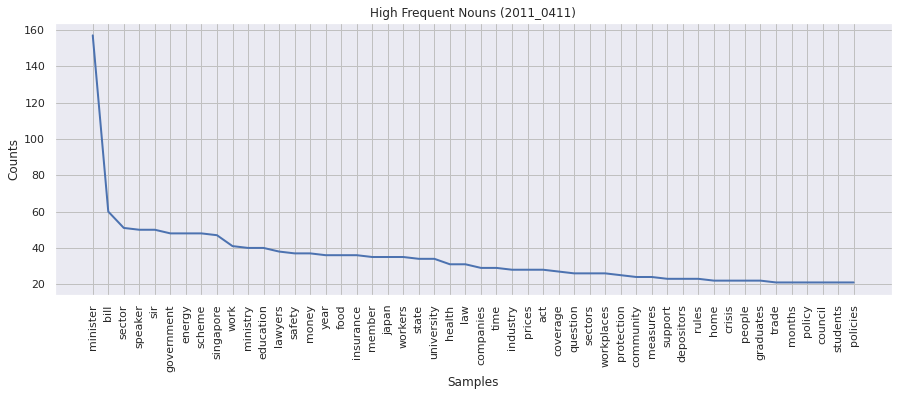

In [ ]:
# output 8 : hig frequent nouns
plt.figure(figsize=(15, 5))              # changing the graph size
plt.rcParams.update({'font.size': 30})   # changing a font size
plt.title('High Frequent Nouns ('+file+')')
nouns=[word for word, pos in tokens_tag if pos in ['NN', 'NNS']]
Freq_dist_nltk = nltk.FreqDist(nouns)
Freq_dist_nltk.plot(50, cumulative=False)

# plt.savefig('/content/drive/MyDrive/Project_prof.Jang/output/'+file+'_nouns.png', 
#             dpi=200, edgecolor='blue')

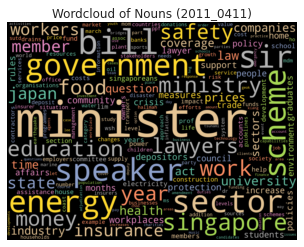

In [ ]:
# output10 : WordCloud of Nouns
from wordcloud import WordCloud

wc = WordCloud(width=2000, height=1500, background_color="black", random_state=1, colormap='Set2', collocations=False)
# plt.imshow(wc.generate_from_frequencies(Freq_dist_nltk))   
plt.imshow(wc.generate_from_frequencies(Freq_dist_nltk), interpolation='bilinear')  #interpolation='bilinear'
plt.title('Wordcloud of Nouns ('+file+')')
plt.axis("off")
plt.show()

# wc.to_file('/content/drive/MyDrive/Project_prof.Jang/output/'+file+'_wordcloud_nouns.png')

In [ ]:
# output 9 : df_nous
# https://stackoverflow.com/questions/15145172/nltk-conditionalfreqdist-to-pandas-dataframe
df_nous = pd.DataFrame(Freq_dist_nltk.items(), columns=['word', 'frequency'])
df_nous_sort=df_nous.sort_values(by = 'frequency', ascending = False).head(20)
df_nous_sort

,word,frequency
45,minister,157
1182,bill,60
451,sector,51
215,sir,50
4,speaker,50
340,energy,48
78,government,48
955,scheme,48
198,singapore,47
490,work,41


* <참고자료>
* [BeautifulSoup으로 크롤링(crawling)(1) - find(), find_all(), .string, get_text()](https://computer-science-student.tistory.com/234?category=1140468)
* [BeautifulSoup으로 크롤링(crawling)(2) - select() 옵션](https://computer-science-student.tistory.com/235?category=1140468)
* [HTML 기본 용어 요소, 태그, 속성 설명](https://oneroomtable.tistory.com/entry/HTML-%EA%B8%B0%EB%B3%B8-%EC%9A%A9%EC%96%B4-%EC%9A%94%EC%86%8C-%ED%83%9C%EA%B7%B8-%EC%86%8D%EC%84%B1-%EC%84%A4%EB%AA%85)
* [HTML Basic Grammar](https://edyoon.tistory.com/1082)